### Q1: What is Estimation Statistics? Explain point estimate and interval estimate. 

   - Estimation statistics, or simply estimation, is a data analysis framework that uses a combination of effect sizes, confidence intervals, precision planning, and meta-analysis to plan experiments, analyze data and interpret results. It complements hypothesis testing approaches such as null hypothesis significance testing (NHST), by going beyond the question is an effect present or not, and provides information about how large an effect is. Estimation statistics is sometimes referred to as the new statistics.
       - A point estimate is a single value estimate of a parameter. For instance, a sample mean is a point estimate of a population mean.
       - An interval estimate gives you a range of values where the parameter is expected to lie. A confidence interval is the most common type of interval estimate.
       _____________

### Q2. Write a Python function to estimate the population mean using a sample mean and standard deviation.

In [1]:
# population = X, Sample = x
X_data = [1,1,1,5,6,6, 7,8, 9,10,12,13]
X_mean_mu = sum(X_data)/len(X_data)
# Same Calculation for sample
x_mean_bar = sum(X_data)/(len(X_data)-1)
print("population mean :", X_mean_mu,'\n' "sample mean", x_mean_bar)

population mean : 6.583333333333333 
sample mean 7.181818181818182


### Q3: What is Hypothesis testing? Why is it used? State the importance of Hypothesis testing.

<h4> Hypothesis testing is a tool for making statistical inferences about the population data.</h4> <h4>It is an analysis tool that tests assumptions and determines how likely something is within a given standard of accuracy.</h4> <h4> Hypothesis testing provides a way to verify whether the results of an experiment are valid.</h4>

In [2]:
import pandas as pd
import math

### Q4. Create a hypothesis that states whether the average weight of male college students is greater than the average weight of female college students.

In [3]:
# Data processing
data = pd.read_csv(filepath_or_buffer = "https://raw.githubusercontent.com/piidus/data_science/data-sample/weight_figshare.csv", index_col="ID")
data = data.rename(columns={'Sex (male=0; female=1)':'Sex', 'Weight 1':'Weight' })
data = data[['Sex', 'Weight']]
male = data['Weight'][data['Sex']==0]
female = data['Weight'][data['Sex']==1]
print('Average weight of male is', male.mean(), 'median :', male.median(),'\n' 'Average wight of female is', female.mean(), 'median', female.median())
# female.head(), male.head()

Average weight of male is 69.67841726618705 median : 69.7 
Average wight of female is 58.85124378109452 median 57.5


    -- The average height of male is greater in this data
____________

### Q5. Write a Python script to conduct a hypothesis test on the difference between two population means, given a sample from each population.

In [4]:
def hypothesis_test(data, sample_size: int):
    '''
    data : dataframe, sample_size : integar
    '''
    mu = data.mean()
    sample_data = data[:sample_size]
    x_bar = sample_data.mean()
    std = sample_data.std()
    N = len(sample_data)
    
    p_value_step1 = (x_bar-mu)/(std/math.sqrt(N))
    print('p-value :', p_value_step1, '|  population mu :',mu)
#     print((sample_size))
#     print(mu, x_bar)

hypothesis_test(male, 40)
hypothesis_test(female, 40)

p-value : 0.03512946996176329 |  population mu : 69.67841726618705
p-value : -0.058422418202513496 |  population mu : 58.85124378109452


In [5]:
# z-score : male = -1.80 . female = -1.57

In [6]:
import numpy as np
from scipy.stats import t

# Define the sample data
sample1 = male[:40] # np.array([1, 2, 3, 4, 5])
sample2 = female[:40] #np.array([3, 4, 5, 6, 7])

# Calculate the means and standard deviations of the samples
mean1 = np.mean(sample1)
mean2 = np.mean(sample2)
std1 = np.std(sample1, ddof=1)
std2 = np.std(sample2, ddof=1)

# Calculate the pooled standard deviation
n1 = len(sample1)
n2 = len(sample2)
df = n1 + n2 - 2
sp = np.sqrt(((n1-1)*(std1**2) + (n2-1)*(std2**2)) / df)

# Calculate the t-statistic
t_statistic = (mean1 - mean2) / (sp * np.sqrt(1/n1 + 1/n2))

# Calculate the p-value
p_value = 2 * t.sf(np.abs(t_statistic), df)

# Print the results
print("t-statistic: {:.2f}".format(t_statistic))
print("p-value: {:.4f}".format(p_value))


t-statistic: 5.89
p-value: 0.0000


In [7]:
from scipy.stats import ttest_ind

# define the sample data for two populations
pop1 = male[:40]
pop2 = female[:40]

# conduct a two-sample t-test on the difference between the population means
statistic, pvalue = ttest_ind(pop1, pop2)

# print the test results
print('Test statistic: ', statistic)
print('P-value: ', pvalue)

# determine the significance level
alpha = 0.05

if pvalue < alpha:
    print('The difference in means is statistically significant.')
else:
    print('The difference in means is not statistically significant.')


Test statistic:  5.885486303052046
P-value:  9.438757751979327e-08
The difference in means is statistically significant.


### Q6: What is a null and alternative hypothesis? Give some examples.
   - Null hypothesis is default or previous statement on which total calculation is based.
   - alternative hypothesis is new or assumtion to cross the null hypothesis

### Q7: Write down the steps involved in hypothesis testing.

- Here are the general steps involved in hypothesis testing:

    - State the null hypothesis (H0) and alternative hypothesis (H1): The null hypothesis is the default assumption that there is no significant difference or relationship between the variables of interest, while the alternative hypothesis is the opposite.

    - Choose a significance level (α): The significance level is the threshold below which we reject the null hypothesis. Typically, a significance level of 0.05 is chosen, which means that we are willing to accept a 5% chance of rejecting the null hypothesis when it is actually true.

    - Determine the appropriate statistical test: The choice of statistical test depends on the type of data and the research question being asked. Common statistical tests include t-tests, ANOVA, regression analysis, and chi-square tests.

    - Calculate the test statistic: The test statistic is a measure of the degree of difference or relationship between the variables of interest. It is calculated based on the sample data and the chosen statistical test.

    - Calculate the p-value: The p-value is the probability of observing a test statistic as extreme as the one calculated, assuming the null hypothesis is true.

    - Compare the p-value to the significance level: If the p-value is less than the significance level, we reject the null hypothesis and conclude that there is evidence for the alternative hypothesis. If the p-value is greater than or equal to the significance level, we fail to reject the null hypothesis and conclude that there is not enough evidence to support the alternative hypothesis.

    - Interpret the results: If we reject the null hypothesis, we can interpret the results in favor of the alternative hypothesis. Otherwise, we conclude that there is not enough evidence to support the alternative hypothesis.

    - Draw conclusions and make recommendations: Based on the results of the hypothesis test, we can draw conclusions about the research question and make recommendations for future research or decision-making.

### Q8. Define p-value and explain its significance in hypothesis testing.

   - p-value is a point estimator,
    - In hypothesis testing, the p-value is the probability of obtaining a test statistic as extreme as, or more extreme than, the observed value, assuming that the null hypothesis is true. Put simply, the p-value tells you the likelihood of obtaining the observed data, or data more extreme, under the assumption that the null hypothesis is true.

    - The p-value is significant in hypothesis testing because it allows you to make a decision about whether to reject or fail to reject the null hypothesis. Typically, a predetermined significance level (alpha) is chosen, and if the p-value is less than or equal to alpha, then the null hypothesis is rejected in favor of the alternative hypothesis. If the p-value is greater than alpha, then the null hypothesis is not rejected.

        - For example, suppose we want to test the hypothesis that the mean weight of a population of apples is 100 grams. We collect a sample of apples and calculate the sample mean weight to be 95 grams, with a p-value of 0.02. If we choose a significance level of 0.05, then we can reject the null hypothesis and conclude that the mean weight of the population is not 100 grams.

    - The p-value provides a way to quantify the evidence against the null hypothesis, with smaller p-values indicating stronger evidence against the null hypothesis. However, it is important to note that the p-value does not provide information about the effect size or the practical significance of the result. Therefore, it is important to consider both the p-value and the effect size when interpreting the results of a hypothesis test.

### Q9. Generate a Student's t-distribution plot using Python's matplotlib library, with the degrees of freedom parameter set to 10.

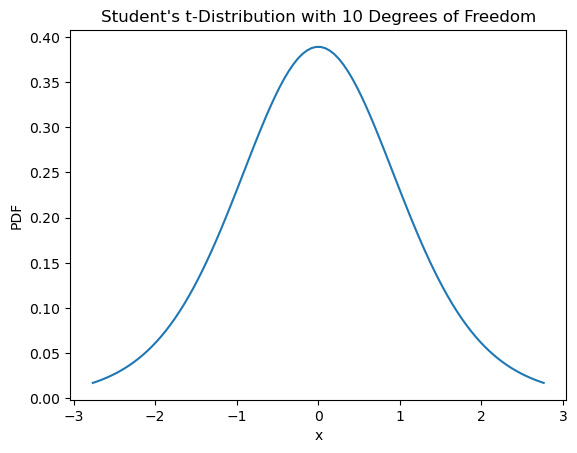

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Define the degrees of freedom
df = 10

# Generate x values for the t-distribution plot
x = np.linspace(t.ppf(0.01, df), t.ppf(0.99, df), 100)

# Generate y values for the t-distribution plot
y = t.pdf(x, df)

# Create the plot
plt.plot(x, y)

# Set the plot title and axis labels
plt.title("Student's t-Distribution with {} Degrees of Freedom".format(df))
plt.xlabel("x")
plt.ylabel("PDF")

# Show the plot
plt.show()


### Q10. Write a Python program to calculate the two-sample t-test for independent samples, given two random samples of equal size and a null hypothesis that the population means are equal.

In [9]:
import numpy as np
from scipy.stats import t

# Define the two random samples
sample1 = [10, 12, 14, 16, 18]
sample2 = [8, 11, 14, 17, 20]

# Define the null hypothesis
null_hypothesis = "The population means are equal."

# Calculate the means and standard deviations of the two samples
mean1 = np.mean(sample1)
mean2 = np.mean(sample2)
std_dev1 = np.std(sample1, ddof=1)
std_dev2 = np.std(sample2, ddof=1)

# Calculate the pooled standard deviation
pooled_std_dev = np.sqrt(((len(sample1) - 1) * std_dev1 ** 2 + (len(sample2) - 1) * std_dev2 ** 2) / (len(sample1) + len(sample2) - 2))

# Calculate the t-statistic
t_stat = (mean1 - mean2) / (pooled_std_dev * np.sqrt(2 / len(sample1)))

# Define the significance level
alpha = 0.05

# Calculate the degrees of freedom
df = len(sample1) + len(sample2) - 2

# Calculate the critical value
critical_value = t.ppf(1 - alpha/2, df)

# Compare the t-statistic to the critical value
if abs(t_stat) > critical_value:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

# Print the t-statistic and p-value
p_value = 2 * (1 - t.cdf(abs(t_stat), df))
print("t-statistic: ", t_stat)
print("p-value: ", p_value)


Fail to reject the null hypothesis.
t-statistic:  0.0
p-value:  1.0


### Q11: What is Student’s t distribution? When to use the t-Distribution.

    - When we calculate p-value without population data, we use student's t distribution.
    it has different parameter, i.e. degee of freedom

### Q12: What is t-statistic? State the formula for t-statistic.

    - In statistics, the t-statistic is a measure of the difference between the mean of a sample and the mean of the population from which the sample was drawn, normalized by the standard error of the sample mean. It is commonly used in hypothesis testing to determine whether a sample mean is significantly different from a population mean.

- The formula for the t-statistic is:

        - t = (x̄ - μ) / (s / √n)

- where:

    - x̄ is the sample mean
    - μ is the population mean (under the null hypothesis)
    - s is the sample standard deviation
    - n is the sample size
        - The t-statistic measures how many standard errors the sample mean is from the population mean. If the t-statistic is large (i.e., farther from zero), it suggests that the sample mean is significantly different from the population mean. The magnitude and direction of the t-statistic is determined by the difference between the sample mean and population mean, as well as the variability of the sample mean. If the sample mean is close to the population mean and the sample variability is low, the t-statistic will be small (i.e., closer to zero), suggesting that the sample mean is not significantly different from the population mean.

### Q13. A coffee shop owner wants to estimate the average daily revenue for their shop. They take a random sample of 50 days and find the sample mean revenue to be 500  with a standard deviation of 50. Estimate the population mean revenue with a 95% confidence interval.

To estimate the population mean revenue with a 95% confidence interval, we can use the following formula:

CI = x̄ ± z* (s / √n)

where:

x̄ is the sample mean revenue
s is the sample standard deviation
n is the sample size
z* is the z-score corresponding to the desired confidence level (95% confidence level corresponds to z* = 1.96)
Substituting the given values, we get:

CI = 500 ± 1.96 * (50 / √50)

Simplifying, we get:

CI = 500 ± 13.82

So the 95% confidence interval for the population mean revenue is ($486.18, $513.82). This means that we can be 95% confident that the true population mean revenue lies within this range.

### Q14. A researcher hypothesizes that a new drug will decrease blood pressure by 10 mmHg. They conduct a clinical trial with 100 patients and find that the sample mean decrease in blood pressure is 8 mmHg with a standard deviation of 3 mmHg. Test the hypothesis with a significance level of 0.05.

To test the hypothesis that the new drug will decrease blood pressure by 10 mmHg, we can perform a one-sample t-test with the following null and alternative hypotheses:

H0: µ = 10 (the drug does not decrease blood pressure by 10 mmHg)
Ha: µ < 10 (the drug decreases blood pressure by less than 10 mmHg)

where µ is the true population mean decrease in blood pressure.

We can use the t-statistic formula to calculate the test statistic:

t = (x̄ - µ) / (s / √n)

where:

x̄ is the sample mean decrease in blood pressure (8 mmHg)
µ is the hypothesized population mean decrease in blood pressure (10 mmHg)
s is the sample standard deviation (3 mmHg)
n is the sample size (100)
Substituting the given values, we get:

t = (8 - 10) / (3 / √100) = -2.82

The degrees of freedom for the t-test is (n-1) = 99. Using a significance level of 0.05 and a one-tailed test (since the alternative hypothesis is one-sided), we can find the critical t-value from a t-distribution table or calculator. For a significance level of 0.05 and 99 degrees of freedom, the critical t-value is -1.660.

Since the calculated t-value (-2.82) is less than the critical t-value (-1.660), we reject the null hypothesis and conclude that there is sufficient evidence to support the claim that the new drug decreases blood pressure by less than 10 mmHg. In other words, the sample provides evidence that the true population mean decrease in blood pressure is less than 10 mmHg.

In [10]:
import scipy.stats as stats

def one_sample_t_test(sample_mean, sample_std, sample_size, hypothesized_mean, alpha=0.05, alternative='less'):
    """
    Perform a one-sample t-test to test the hypothesis that the population mean is equal to a hypothesized value.

    Parameters:
    sample_mean (float): sample mean
    sample_std (float): sample standard deviation
    sample_size (int): sample size
    hypothesized_mean (float): hypothesized population mean
    alpha (float): significance level (default is 0.05)
    alternative (str): alternative hypothesis ('less', 'greater', or 'two-sided') (default is 'less')

    Returns:
    (float, float, bool): t-statistic, p-value, and a boolean indicating whether to reject the null hypothesis
    """
    df = sample_size - 1
    se = sample_std / (sample_size ** 0.5)
    t_stat = (sample_mean - hypothesized_mean) / se
    if alternative == 'less':
        p_value = stats.t.cdf(t_stat, df)
        reject_null = p_value < alpha
    elif alternative == 'greater':
        p_value = 1 - stats.t.cdf(t_stat, df)
        reject_null = p_value < alpha
    elif alternative == 'two-sided':
        p_value = (1 - stats.t.cdf(abs(t_stat), df)) * 2
        reject_null = p_value < alpha
    else:
        raise ValueError("alternative must be 'less', 'greater', or 'two-sided'")
    return t_stat, p_value, reject_null

one_sample_t_test(8,3,100,10)

(-6.666666666666667, 7.506144504985108e-10, True)

In [11]:
t_stat, p_value, reject_null = one_sample_t_test(sample_mean=8, sample_std=3, sample_size=100, hypothesized_mean=10, alpha=0.05, alternative='less')
print('t-statistic:', t_stat)
print('p-value:', p_value)
print('Reject null hypothesis:', reject_null)


t-statistic: -6.666666666666667
p-value: 7.506144504985108e-10
Reject null hypothesis: True


### Q15. An electronics company produces a certain type of product with a mean weight of 5 pounds and a standard deviation of 0.5 pounds. A random sample of 25 products is taken, and the sample mean weight is found to be 4.8 pounds. Test the hypothesis that the true mean weight of the products is less than 5 pounds with a significance level of 0.01.

In [12]:
import math
import scipy.stats as stats

def one_sample_t_test(sample_mean, sample_std, sample_size, hypothesized_mean, alpha=0.05, alternative='less'):
    """
    Perform a one-sample t-test to test the hypothesis that the population mean is equal to a hypothesized value.

    Parameters:
    sample_mean (float): sample mean
    sample_std (float): sample standard deviation
    sample_size (int): sample size
    hypothesized_mean (float): hypothesized population mean
    alpha (float): significance level (default is 0.05)
    alternative (str): alternative hypothesis ('less', 'greater', or 'two-sided') (default is 'less')

    Returns:
    (float, float, bool): t-statistic, p-value, and a boolean indicating whether to reject the null hypothesis
    """
    df = sample_size - 1
    se = sample_std / (sample_size ** 0.5)
    t_stat = (sample_mean - hypothesized_mean) / se
    if alternative == 'less':
        p_value = stats.t.cdf(t_stat, df)
        reject_null = p_value < alpha
    elif alternative == 'greater':
        p_value = 1 - stats.t.cdf(t_stat, df)
        reject_null = p_value < alpha
    elif alternative == 'two-sided':
        p_value = (1 - stats.t.cdf(abs(t_stat), df)) * 2
        reject_null = p_value < alpha
    else:
        raise ValueError("alternative must be 'less', 'greater', or 'two-sided'")
    return t_stat, p_value, reject_null


# Given data
sample_mean = 4.8
sample_std = 0.5
sample_size = 25
hypothesized_mean = 5
alpha = 0.01

# Perform one-sample t-test
t_stat, p_value, reject_null = one_sample_t_test(sample_mean, sample_std, sample_size, hypothesized_mean, alpha, 'less')

# Print results
print(f"Sample mean = {sample_mean}")
print(f"Sample standard deviation = {sample_std}")
print(f"Sample size = {sample_size}")
print(f"Hypothesized mean = {hypothesized_mean}")
print(f"Significance level = {alpha}")
print(f"Alternative hypothesis: True mean weight is less than {hypothesized_mean}")
print(f"t-statistic = {t_stat}")
print(f"p-value = {p_value}")
if reject_null:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")


Sample mean = 4.8
Sample standard deviation = 0.5
Sample size = 25
Hypothesized mean = 5
Significance level = 0.01
Alternative hypothesis: True mean weight is less than 5
t-statistic = -2.0000000000000018
p-value = 0.02846992496829572
Fail to reject null hypothesis


### Q16. Two groups of students are given different study materials to prepare for a test. The first group (n1 = 30) has a mean score of 80 with a standard deviation of 10, and the second group (n2 = 40) has a mean score of 75 with a standard deviation of 8. Test the hypothesis that the population means for the two groups are equal with a significance level of 0.01.

In [13]:
from scipy.stats import t

# sample data
n1 = 30
x1 = 80
s1 = 10
n2 = 40
x2 = 75
s2 = 8
alpha = 0.01

# calculate the pooled standard deviation
s_pool = ((n1 - 1) * s1 ** 2 + (n2 - 1) * s2 ** 2) / (n1 + n2 - 2)
s_pool = s_pool ** 0.5

# calculate the t statistic and p-value
t_stat = (x1 - x2) / (s_pool * ((1 / n1) + (1 / n2))) ** 0.5
p_val = 2 * t.sf(abs(t_stat), n1 + n2 - 2)

# compare the p-value with the significance level
if p_val < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_val:.4f}")


Reject the null hypothesis.
t-statistic: 6.94
p-value: 0.0000


### Q17. A marketing company wants to estimate the average number of ads watched by viewers during a TV program. They take a random sample of 50 viewers and find that the sample mean is 4 with a standard deviation of 1.5. Estimate the population mean with a 99% confidence interval.

In [14]:
from scipy.stats import t
import numpy as np

def mean_confidence_interval(sample_mean, sample_std, sample_size, confidence_level):
    df = sample_size - 1
    alpha = 1 - confidence_level
    t_value = abs(t.ppf(alpha/2, df))
    margin_of_error = t_value * (sample_std / np.sqrt(sample_size))
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    return (lower_bound, upper_bound)


In [15]:
sample_mean = 4
sample_std = 1.5
sample_size = 50
confidence_level = 0.99

lower, upper = mean_confidence_interval(sample_mean, sample_std, sample_size, confidence_level)

print(f"The 99% confidence interval for the population mean is ({lower:.2f}, {upper:.2f})")


The 99% confidence interval for the population mean is (3.43, 4.57)
